<h2>Heap Sort</h2>
Este es otro algortimo de ordenación cuyo tiempo de ejecución es &Omicron;(nlg(n)) al igual que merge sort y como insertion sort solo un número constante de elementos del arreglo son ordenados fuera del arreglo. Por lo tanto podemos decir que tiene las bondades de ambos métodos, para poder lograr esto introduce un nuevo concepto a los algoritmos de ordenación, el cual es una estructura de datos llamada "heap".<br>

<b>Heap (binario): </b>Un heap lo podemos ver ya sea como un árbol binario o como un arreglo, un donde vamos a tener un elemento raíz y posteriormente, cada  elemento va a tener una relación de padre - hijo, es decir, a parte del nodo raíz cada elemento tiene un padre.

<br>
Ejemplos de Heap visto como árbol y como arreglo:<br>
<img src="https://github.com/GenaroGA/AnalisisAlgoritmos/blob/main/img/ejemplos_heap.jpeg?raw=true" alt="Ejemplos Heap" /><br>
Existen 2 tipos de heaps: min-heaps y max-heaps cada uno de estos los elemntos en la estructura obedecen a una propiedad del heap.<br>

La propiedad de un max-heap es que para cada nodo a excepción del nodo raíz, el nodo puede tener un valor igual o menor al de su padre.<br>

La propiedad de un min-heap es que para cada nodo a excepción del nodo raíz, el nodo puede tener un valor igual o mayor al de su padre.<br>

Para el algortimo de Heapsort utilizaremos <b>MAX HEAP</b><br>
Al árbol (a) que mostró anteriormente es un ejemplo de un Max Heap

<h4>Max-Heapify</h4>
Esta función sirve para transformar un heap en un max-heap. Funciona dandole como parámetros el arreglo y un índice (nosotros vamos a agergar un tercero ya que lo estamos trabajando como un arreglo en la lógica del programa, el tercer parámetro es el heap-size). La función Max-Heapify asume que los hijos del elemento que estamos tomando como índice YA SON MAX HEAPS (de los hijos hacia abajo) pero corrige el escenario en que esos hijos puedan ser mayores al padre (el cual es el nodo que estamos pasando como parámetro). <br>

El pseudo algorimto que vamos a usar como referencia es el siguiente (Cormen, p. 154):
<br>
<img src="https://github.com/GenaroGA/AnalisisAlgoritmos/blob/main/img/pseudo_max-heapify.jpeg?raw=true" alt="Pseudocodigo Max-Heapify" />

In [5]:
def max_heapify(A, i, heap_size):
    #hijo izquierdo, al multiplicar x2 el índice del nodo encontramos el índice su primer hijo en el arreglo
    l = i * 2 
    #hijo derecho, el siguiente hijo será el elemto siguiente
    r = l + 1
    #la primera condición es el caso base, el criterio de paro
    #la segunda es una comparación entre el valor del hijo izquierdo y el padre
    if l <= heap_size and A[l] > A[i]:
        #en caso de que el hijo izquierdo sea mayor
        largest = l
    else:
        #en caso de que el padre sea mayor
        largest = i
    #la primera condición es el caso base, el criterio de paro
    #la segunda es una comparación entre el valor del hijo izquierdo y el padre
    if r <= heap_size and A[r] > A[largest]:
        #en caso de que el hijo derecho sea mayor
        largest = r
    #si el mayor de los 3 NO es el padre
    if i != largest:
        #interambiamos al padre con el elemnto mayor para que ahora ese sea el padre
        A[i], A[largest] = A[largest], A[i]
        #Recusión:
        #como modificamos, ahora tenemos que aplicar el mismo algortimo de donde esta el padre anterior hacia abajo
        max_heapify(A, largest, heap_size)

<h4>Build Max-Heap</h4>
La manera en que vamos a ultilizar la función Max_heapify es dentro de otra función que llamaremos Build Max-Heap. Esta función tiene como objetivo tomar el arreglo que vamos a ordenar y regresar ese mismo arreglo pero con la estructura de un Max-Heap.<br>

El pseudo algorimto que vamos a usar como referencia es el siguiente (Cormen, p. 154):
<br>
<img src="https://github.com/GenaroGA/AnalisisAlgoritmos/blob/main/img/pseudo_build-max-heap.jpeg?raw=true" alt="Pseudocodigo Build Max-Heap" />

In [4]:
import math
def build_max_heap(A, heap_size):
    for i in range(math.floor(heap_size/2) - 1, 0, -1):
        max_heapify(A, i, heap_size) 

<h4>Heapsort</h4>
En esta función vamos a utilizar la función Build Max-Heap para crear el primer Max-Heap que contenga a los elementos del arreglo, por definición de un Max-Heap el elemento que quede en la posición de la raíz va a ser el mayor, entonces lo que se hace es tomar ese elemento y mandarlo al final del arreglo, es decir se intercmabia con el último elemento del arreglo, se "disminuye" el tamaño del arreglo para ya no considerar los elementos "del final" y se ocupa la función Max Heapify para volver a hacer un Max Heap y saber cual es la raíz para mandarla al final con las raices anteriores y el procedimiento se va a repetir hasta que todos los elementos del heap hayan pasado "al final".<br>

El pseudo algorimto que vamos a usar como referencia es el siguiente (Cormen, p. 160):
<br>
<img src="https://github.com/GenaroGA/AnalisisAlgoritmos/blob/main/img/pseudo_heapsort.jpeg?raw=true" alt="Pseudocodigo Heapsort" />

In [17]:
def heap_sort(A, heap_size):
    #se crea el max heap inicial
    build_max_heap(A, heap_size)
    
    for i in range(len(A[1:]), 1, -1):
        #el elemento en la raíz es el mayor y se pone al final
        A[1], A[i] = A[i], A[1]
        heap_size = heap_size - 1
        #ejectumos de nuevo pero para un heap redeucido, ya no tomamos en cuenta el que mandamos al final
        max_heapify(A, 1, heap_size)

Verificamos que el algoritmo esté funcionando correctamente:

In [15]:
A = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
#en los algoritmos que implementamos se utiliza el tamaño del arreglo y el indice como dependientes
#pero en python los índices empiezan en 0 no en 1, mientras que el tamaño es el mismo
#para resolver esta desconexión se va a insertar un elemento en el arrgelo, el cual no va a ser ordenado
#pero ayudará a recorrer los índices, el tamaño se considerará a prtir del índice 1 (A[1:]) para que se mantenga correcto
A.insert(0, 0)
heap_size = len(A[1:])
heap_sort(A, heap_size)
print (A[1:])

[1, 2, 3, 4, 7, 8, 9, 10, 14, 16]


<h3>Verificación del algoritmo</h3>
<b>Caso base (Recursión Max Heapify):</b> Dentro de las condiciones que tenemos en el if, se encuentran:<br>
if l <= heap_size<br>
if r <= heap_size<br>
Las cuales nos sirven para ponerle un límite a la recursión y sólo buscará en los índices que se encuenytren contenidos en el tamaño del arreglo (del heap). Si ninguno de los dos casos entra, como consecuencia el tercer if tampoco entra y se detiene la recursión.<br>
<br>
<b>Orden:</b> El algortimo funciona ya que simepre toma el nodo raíz de un max heap.<br>

Lo primero que hace el algortimo es generar un max heap con la función build_max_heap, posterioirmente toma la raíz de ese max heap y ese será el mayor de los elementos, ese elemento se manda al final del arreglo, intercambiambiandolo con el último elemento del arreglo.<br>

Después se vuelve a ejecutar la función Max-Heapify por lo que se garantiza la propiedad Max-Heap, pero ahora se ejecuta para el arreglo -1, se toma el nodo raíz de este max heap nuevo y por la definición de max heap se garantiza que este elemento sera menor o igual a la raíz anterior.<br>

Esto se ejectua hasta que i=1, por lo tanto todos los elementos van a estar ordanados de menor a mayor.


<h3>Timepo de ejecución</h3>
<b>Función Max Heapify:</b>El timepo de ejecución de max_heapify en un arreglo tamaño n con raíz en el nodo i es el &Theta;(1) tiempo que se tarde en arreglar el orden padre - hijo entre A[i], su hijo izquierdo y su hijo derecho más el tiempo que se tarde en ejecutarse la recursión para arreglar de los hijos hacia abajo (asumiendo que se ejecuta la recursión), el tamaño del sub-árbol que resultaría de tomar a los hijos como raíz hacia abajo es máximo 2n/3, por lo tanto: <br>
T(n) <= T(2n/3) + &Theta;(1)<br>

Resolviendo esa recursión nos queda: T(n) = &Omicron; (lg(n))<br>

<b>Función Build Max Heap:</b> Tomando en cuenta que max_heapify tarda &Omicron; (h) cuando se ejecuta desde una altura h podemos acotar y despupes de hacer álgebra se logra acotar el tiempo de ejecución de build_max_heap a &Omicron; (n)

<b>Función Heapsort:</b> Ya que build_max_heap se ejecuta una vez con un tiempo de ejecución &Omicron; (n) y después de ejecuta max_heapify n-1 veces con un timepo de ejecución de &Omicron; (lg(n)) cada vez que se ejecuta, el tiempo de ejecución de heapsort es &Omicron;(nlg(n))

<h3>Experimentación con el tiempo de ejecución</h3>
Vamos a ejecutar 10 veces el algortimo con diferentes tamaños de arreglo por ordenar y graficaremos los tiempos de ejecución para se pueda observar como coinciden con el tiempo de ejecución que calculamos:

In [35]:
from timeit import default_timer
import random

A = []
#en este ciclo for se define el tamaño del arreglo p
for i in range(0, 1000000):
  n = random.randint(-1000000,1000000)
  A.append(n)
A.insert(0, 0)
heap_size = len(A[1:])
inicio = default_timer()
heap_sort(A, heap_size)
#print(A[1:])
fin = default_timer()
print("")
print(str(i+1) + ' elementos: ' + str(fin-inicio))


1000000 elementos: 22.51850430000013


Text(0, 0.5, 'Segundos')

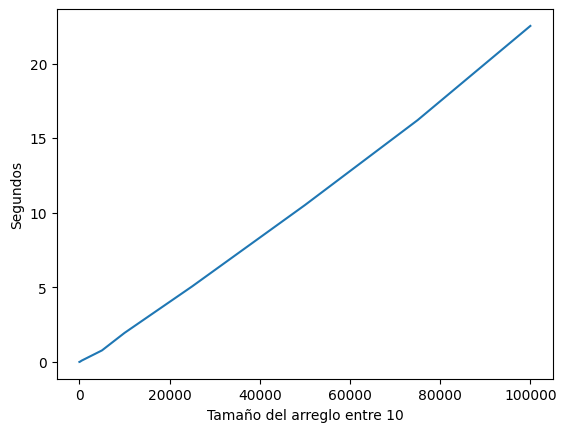

In [40]:
import matplotlib.pyplot as plt

elementos = [5, 50, 100, 500, 5000, 10000, 25000, 50000, 75000, 100000]
tiempos = [0.0006579000000783708, 0.00447119999989809,  0.010834699999577424, 0.0891750000000684, 0.7727069000002302, 1.9449193999998897, 5.063261799999964, 10.510573900000054, 16.20587969999997, 22.51850430000013]
import matplotlib.pyplot as plt

plt.plot(elementos, tiempos)
plt.xlabel('Tamaño del arreglo entre 10')
plt.ylabel('Segundos')